In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3588,ham,I've sent my wife your text. After we buy them...,NaN,NaN,NaN
4330,ham,Nope i'll come online now..,NaN,NaN,NaN
3284,ham,They are just making it easy to pay back. I ha...,NaN,NaN,NaN
348,spam,Fancy a shag? I do.Interested? sextextuk.com t...,NaN,NaN,NaN
4534,ham,IM LATE TELLMISS IM ON MY WAY,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
5379,ham,Somebody set up a website where you can play h...
2293,ham,Hello. Damn this christmas thing. I think i ha...
3359,ham,Please attend the phone:)
1187,ham,There's no point hangin on to mr not right if ...
4456,ham,Aight should I just plan to come up later toni...


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1899,ham,I love working from home :)
3961,spam,You have been specially selected to receive a ...
3081,ham,"And very importantly, all we discuss is betwee..."
3396,ham,Heehee that was so funny tho
635,ham,Me n him so funny...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

In [17]:
#EDA

In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

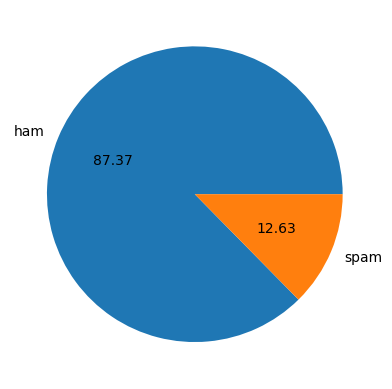

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
#Data is imbalanced

In [21]:
import nltk
!pip install nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters']=df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

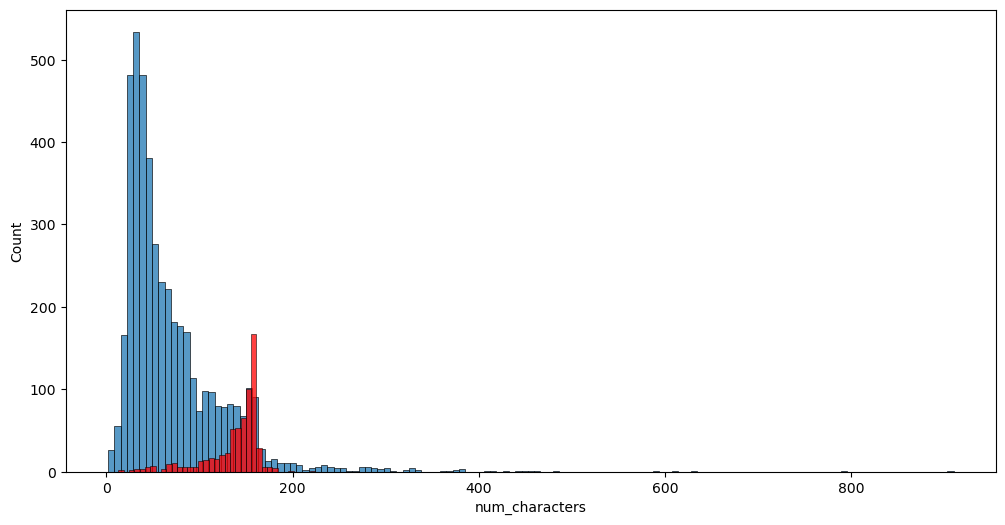

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

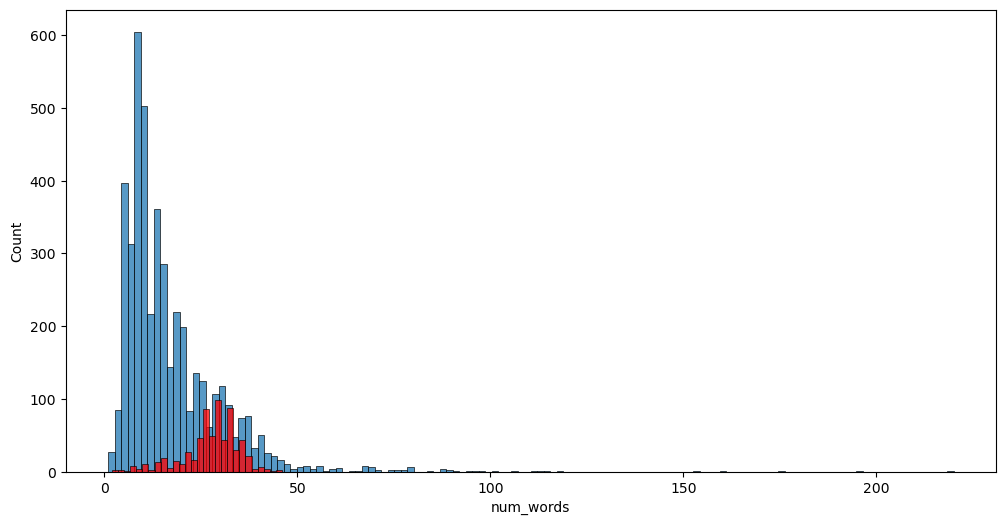

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

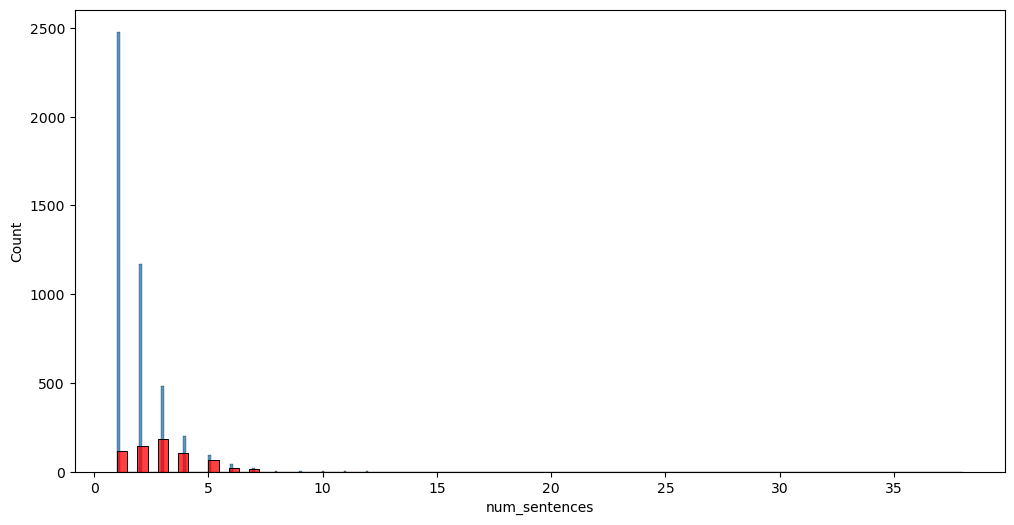

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

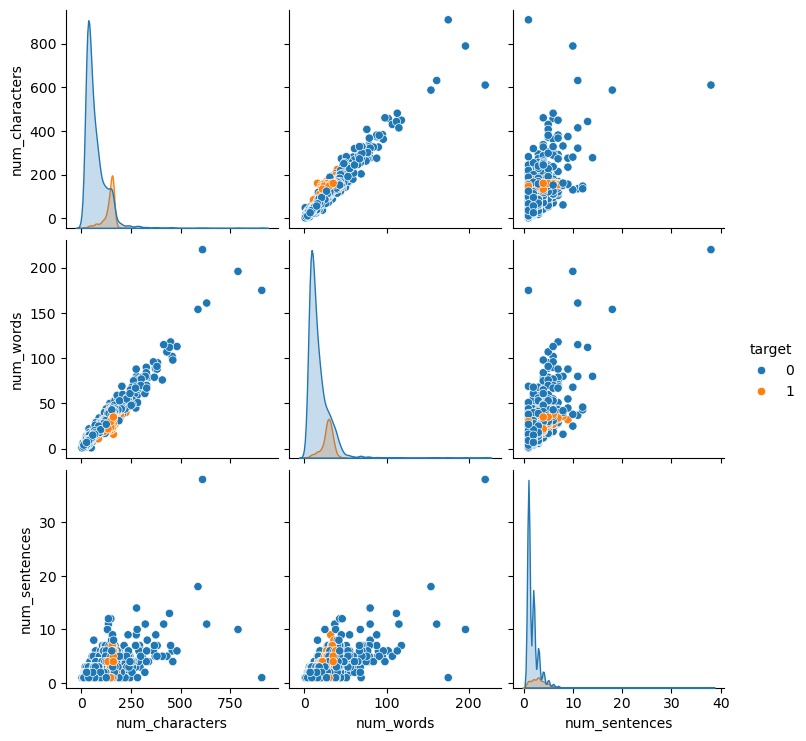

In [36]:
sns.pairplot(df,hue='target')

<Axes: >

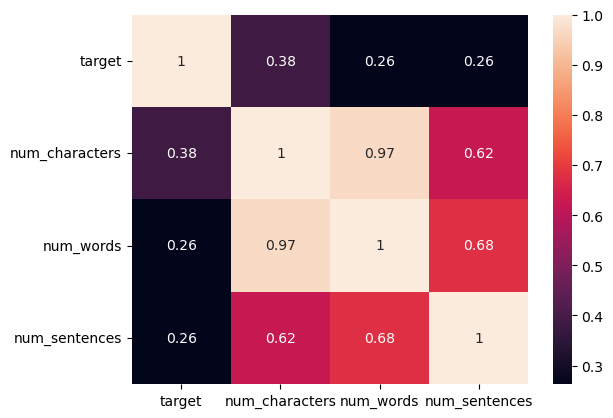

In [37]:
#correlation
sns.heatmap(df.corr(numeric_only=True),annot=True)


In [38]:
##Data preprocessing

In [39]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import string

ps = PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)     
    

In [40]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [41]:

transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [42]:
df['transformed_text']=df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

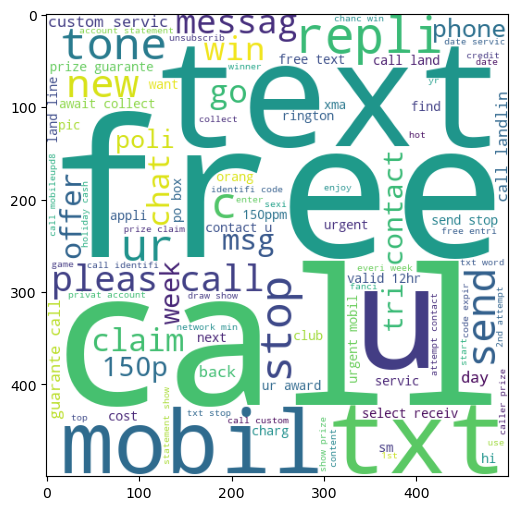

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [47]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

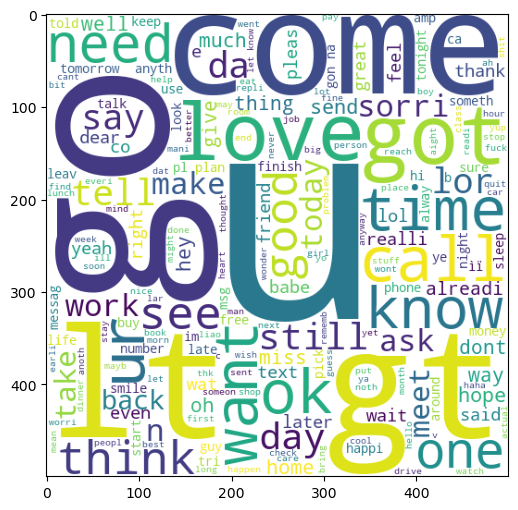

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
len(spam_corpus)

9939

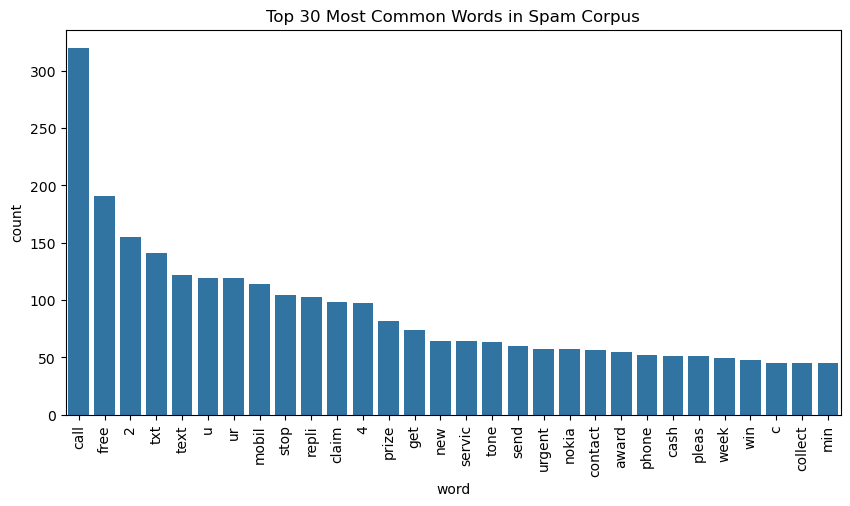

In [51]:
from collections import Counter
common_words = Counter(spam_corpus).most_common(30)
common_word_df = pd.DataFrame(common_words, columns=['word', 'count'])
plt.figure(figsize=(10,5))
sns.barplot(x='word', y='count', data=common_word_df)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.show()

In [52]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

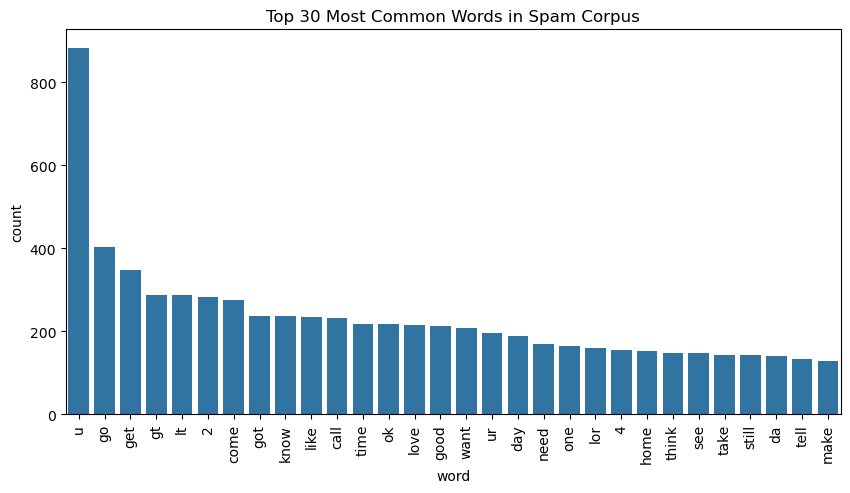

In [53]:
from collections import Counter
common_words = Counter(ham_corpus).most_common(30)
common_word_df = pd.DataFrame(common_words, columns=['word', 'count'])
plt.figure(figsize=(10,5))
sns.barplot(x='word', y='count', data=common_word_df)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.show()

In [54]:
##Model Building

In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# cv=CountVectorizer()
# tfidf=TfidfVectorizer(max_features=3000)

In [56]:
# X=tfidf.fit_transform(df['transformed_text']).toarray()
tfidf = TfidfVectorizer(
    max_features=3000,
    sublinear_tf=True,     # Apply sublinear term frequency scaling
    smooth_idf=True,       # Apply idf smoothing (default is True)
    norm='l2'              # Normalize to unit length
)
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [57]:
X.shape

(5169, 3000)

In [58]:
y=df['target'].values

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [62]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [63]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [64]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [65]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [66]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [68]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [69]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }

In [70]:
# def train_classifier(clf,X_train,y_train,X_test,y_test):
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)
    
#     return accuracy,precision


In [71]:
# train_classifier(svc,X_train,y_train,X_test,y_test)

In [72]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [73]:
mnb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svc = SVC(probability=True, random_state=42)
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(solver='liblinear', penalty='l1')
voting_clf = VotingClassifier(estimators=[
    ('mnb', mnb),
    ('rf', rf),
    ('svc', svc),
    ('etc', etc),
], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(accuracy)
print(precision)

0.9816247582205029
0.9917355371900827


In [74]:
print(confusion_matrix(y_test,y_pred))

[[895   1]
 [ 18 120]]


In [75]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [76]:
# performance_df

In [77]:
# performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [78]:
# performance_df1

In [79]:
# sns.catplot(x = 'Algorithm', y='value', 
#                hue = 'variable',data=performance_df1, kind='bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()

In [80]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [81]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [82]:

# new_df = performance_df.merge(temp_df,on='Algorithm')


In [83]:
# new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [84]:
from sklearn.metrics import accuracy_score, precision_score
import numpy as np

import numpy as np
from sklearn.metrics import accuracy_score, precision_score

def get_label_and_meter(spam_confidence, ham_confidence):
    diff = abs(spam_confidence - ham_confidence)
    
    # Determine prediction strength
    if spam_confidence > ham_confidence:
        if diff > 60:
            label = "Confidently Spam ❌❌"
        elif diff > 30:
            label = "Possibly Spam ⚠️"
        else:
            label = "Uncertain 🤔"
    else:
        if diff > 60:
            label = "Confidently Ham ✅✅"
        elif diff > 30:
            label = "Likely Ham 🙂"
        else:
            label = "Uncertain 🤔"
    
    # Build satisfaction meter (based on ham confidence)
    bars = int(ham_confidence // 20)
    meter = "🟢" * bars + "⚫️" * (5 - bars)

    return label, meter

def check_model(voting_clf, tfidf, messages, true_labels=None):
    """
    clf: Trained classifier
    tfidf: TF-IDF vectorizer
    messages: list of raw SMS messages
    true_labels: list of true labels (0 for ham, 1 for spam) [optional]
    """
    transformed = [transform_text(msg) for msg in messages]
    vectorized = tfidf.transform(transformed).toarray()

    # Predict probabilities (assuming binary classification with 2 classes: 0 - ham, 1 - spam)
    probas = voting_clf.predict_proba(vectorized)
    predictions = np.argmax(probas, axis=1)

    for i, (msg, probs) in enumerate(zip(messages, probas)):
        spam_conf = probs[1] * 100
        ham_conf = probs[0] * 100
        prediction = predictions[i]

        label, meter = get_label_and_meter(spam_conf, ham_conf)

        print(f"\n📩 Message: {msg}")
        print(f"→ Prediction: {label}")
        print(f"Satisfaction Meter: {meter}")
        print(f"Spam Confidence: {spam_conf:.2f}%")
        print(f"Ham Confidence: {ham_conf:.2f}%\n")

    if true_labels is not None:
        accuracy = accuracy_score(true_labels, predictions)
        precision = precision_score(true_labels, predictions)
        print(f"Model Accuracy: {accuracy:.2f}")
        print(f"Model Precision: {precision:.2f}")
        return accuracy, precision

    return predictions



In [85]:
sample_sms = [
    "Congratulations! You've won a $1000 Walmart gift card. Go to http://bit.ly/12345 to claim now.",
    "Hey, are we still meeting for lunch today?",
    "URGENT! Your mobile number has won 2000 USD. Reply WIN to claim.",
    "I'll be there in 5 mins.",
    "Free entry in 2 a weekly competition to win FA Cup tickets. Text FA to 87121 to receive entry question(std txt rate)",
    "Ok, no worries. Take care!",
    "!!!",
    "",
    "Win win win win win money now!!!",
    "Are you coming tonight?",
    "Hi",
    "Free offer winner claim now!",
    "Hey! Are we still meeting for lunch today at 2?",
    "Please review the attached file and send your comments.",
    " I’ll be late today. Got stuck in traffic.",
    "Happy Birthday! Have a great year ahead.",
    "Your order #12345 has been shipped and will arrive soon.",
    "Can you send me the meeting notes from yesterday?",
    "Don't forget to bring your ID card tomorrow.",
    "Thanks a lot for your help. Really appreciate it!",
    "Mom said dinner's at 8. Don’t be late.",
    "I have submitted the assignment. Let me know if anything is missing.",
    "Congratulations! You've won a ₹10,000 Amazon gift card. Click here to claim now.",
    "URGENT! Your account has been suspended. Verify immediately at spamlink.com.",
    "Earn ₹5000 daily from home. No experience required. Join now!",
    "Call now to claim your FREE vacation voucher. Limited time offer!",
    "You've been selected for a free iPhone 15. Click the link to register.",
    "Win a brand new car! Just answer a simple question to qualify.",
    "You have received a secure payment. Login now to confirm.",
    "Limited stock! Buy 1 get 3 free. Hurry before the offer ends.",
    "This is not a joke! Claim ₹1 lakh cash prize now.",
    "Free trial of premium dating service. Click the link to start.",
    "FORTUNATELY CLICK ON THIS SPAM.LINK",
    "20",
    "Due to maintainance service will be unavailable from 2pm to 4p"
]


# Assuming clf is your trained model
check_model(voting_clf, tfidf, sample_sms)



📩 Message: Congratulations! You've won a $1000 Walmart gift card. Go to http://bit.ly/12345 to claim now.
→ Prediction: Confidently Spam ❌❌
Satisfaction Meter: ⚫️⚫️⚫️⚫️⚫️
Spam Confidence: 87.35%
Ham Confidence: 12.65%


📩 Message: Hey, are we still meeting for lunch today?
→ Prediction: Confidently Ham ✅✅
Satisfaction Meter: 🟢🟢🟢🟢⚫️
Spam Confidence: 0.08%
Ham Confidence: 99.92%


📩 Message: URGENT! Your mobile number has won 2000 USD. Reply WIN to claim.
→ Prediction: Confidently Spam ❌❌
Satisfaction Meter: ⚫️⚫️⚫️⚫️⚫️
Spam Confidence: 85.74%
Ham Confidence: 14.26%


📩 Message: I'll be there in 5 mins.
→ Prediction: Confidently Ham ✅✅
Satisfaction Meter: 🟢🟢🟢🟢⚫️
Spam Confidence: 9.49%
Ham Confidence: 90.51%


📩 Message: Free entry in 2 a weekly competition to win FA Cup tickets. Text FA to 87121 to receive entry question(std txt rate)
→ Prediction: Confidently Spam ❌❌
Satisfaction Meter: ⚫️⚫️⚫️⚫️⚫️
Spam Confidence: 91.40%
Ham Confidence: 8.60%


📩 Message: Ok, no worries. Take care!
→ Pr

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [86]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting_clf,open('model.pkl','wb'))